## Agenda:
    1. Collect Data - Done
    2. Apply Strategy
    3. Monitor
    
   ### @TODO
    1. X-axis should be in hh:mm 

## 1) Collect Data

In [ ]:
import yfinance as yf

# Collect Data for 1 min duration

data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
#         tickers = "SPY AAPL MSFT",
        tickers = "SBIN.NS",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "1d",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
#         group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

# Split Datetime to new columns
data2 = data.copy()

data2['hour'], data2['minute']  = data.index.hour, data.index.minute
data2['hour_mins'] = data2['hour'].astype(str) + data2['minute'].astype(str)

data = data2
data.fillna(0)

data.head

In [ ]:
# data.to_csv('SBIN.csv')

In [ ]:
# Review data details

print(data.columns.tolist())
print("size: ",data.size)

data


## =========================================
## TA Strategies 
    1. Apply one strategies as per preference
        a. Aroon Indicator - Done
        b. MACD - Moving Average Convergence/Divergence - Done
        c. Relative Strength Index - RSI - Done
        d. On-Balance Volume - OBV - Done
        e. Accumulation/Distribution Indicator - Done
        f. ADX - Average Directional Movement Index - Done
        g. Stochastic Oscillator - Done
    2. Multiple starategies

In [202]:
# imports
import pandas as pd
import pandas_datareader.data as pdr
import datetime
import talib
from talib.abstract import *
from talib import MA_Type

import matplotlib.pyplot as plt 
plt.style.use('bmh')

In [203]:
import pandas as pd

# use df from step-1
# aapl = data

# use CSV from system
aapl = pd.read_csv('SBIN.csv')
aapl

,Datetime,Open,High,Low,Close,Volume
0,2023-07-14 09:15:00+05:30,587.450012,588.400024,587.450012,588.400024,0
1,2023-07-14 09:16:00+05:30,588.500000,589.400024,588.200012,589.400024,198235
2,2023-07-14 09:17:00+05:30,589.349976,589.849976,589.049988,589.849976,204336
3,2023-07-14 09:18:00+05:30,589.849976,589.900024,588.650024,589.000000,171728
4,2023-07-14 09:19:00+05:30,589.000000,589.049988,588.500000,588.500000,99209
...,...,...,...,...,...,...
370,2023-07-14 15:25:00+05:30,584.700012,584.799988,584.450012,584.700012,112117
371,2023-07-14 15:26:00+05:30,584.750000,584.799988,584.450012,584.700012,36528
372,2023-07-14 15:27:00+05:30,584.599976,584.799988,584.450012,584.700012,45870
373,2023-07-14 15:28:00+05:30,584.549988,584.750000,584.450012,584.750000,46631


In [205]:
aapl

,Datetime,Open,High,Low,Close,Volume
0,2023-07-14 09:15:00+05:30,587.450012,588.400024,587.450012,588.400024,0
1,2023-07-14 09:16:00+05:30,588.500000,589.400024,588.200012,589.400024,198235
2,2023-07-14 09:17:00+05:30,589.349976,589.849976,589.049988,589.849976,204336
3,2023-07-14 09:18:00+05:30,589.849976,589.900024,588.650024,589.000000,171728
4,2023-07-14 09:19:00+05:30,589.000000,589.049988,588.500000,588.500000,99209
...,...,...,...,...,...,...
370,2023-07-14 15:25:00+05:30,584.700012,584.799988,584.450012,584.700012,112117
371,2023-07-14 15:26:00+05:30,584.750000,584.799988,584.450012,584.700012,36528
372,2023-07-14 15:27:00+05:30,584.599976,584.799988,584.450012,584.700012,45870
373,2023-07-14 15:28:00+05:30,584.549988,584.750000,584.450012,584.750000,46631


In [ ]:
# aapl.head()

# # Split Datetime to new columns
# aapl2 = aapl.copy()

# aapl2['hour'], aapl2['minute']  = aapl.index.hour, aapl.index.minute
# aapl2['hour_mins'] = aapl2['hour'].astype(str) + aapl2['minute'].astype(str)

# aapl = aapl2
# aapl.fillna(0)

# aapl.head

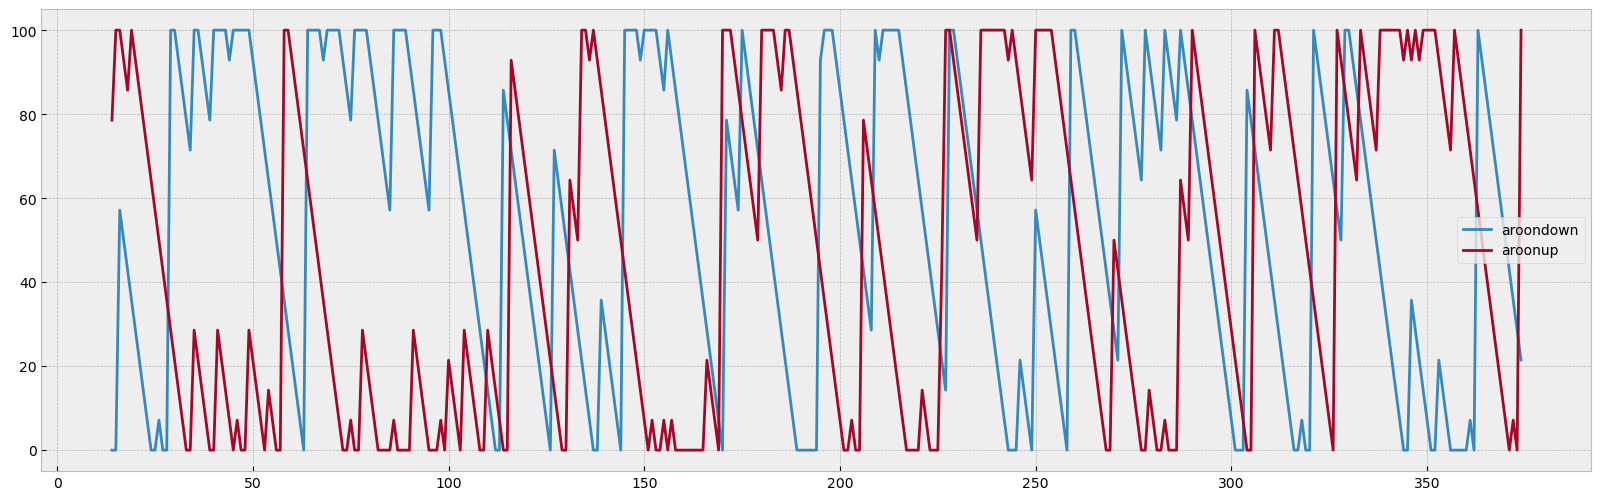

In [207]:
# AROON Indicator
aapl['aroondown'], aapl['aroonup'] = AROON(aapl['High'], aapl['Low'], timeperiod=14)


aapl[['aroondown','aroonup']].plot(figsize=(20,6)) 
plt.show()

# (aroondown, aroonup).plot(figsize=(12,6)) 
# plt.show()

# aapl.fillna(0)
# aapl.head()

In [ ]:
# MACD - Moving Average Convergence/Divergence

# macd, macdsignal, macdhist = MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

aapl['macd'], aapl['macdsignal'], aapl['macdhist'] = MACD(aapl['Close'], fastperiod=12, slowperiod=26, signalperiod=9)


aapl[['macd', 'macdsignal', 'macdhist']].plot(figsize=(16,6)) 
plt.show()

In [ ]:
# aapl.fillna(0)

In [ ]:
# RSI
aapl['RSI'] = ta.RSI(aapl['Close'],14) 
aapl['RSI'].plot(figsize=(12,6)) 
plt.show()


In [ ]:
# OBV - On Balance Volume
# real_obv = OBV(close, volume)

aapl['OBV'] = OBV(aapl['Close'], aapl['Volume'])

aapl[['OBV']].plot(figsize=(16,6)) 
plt.show()

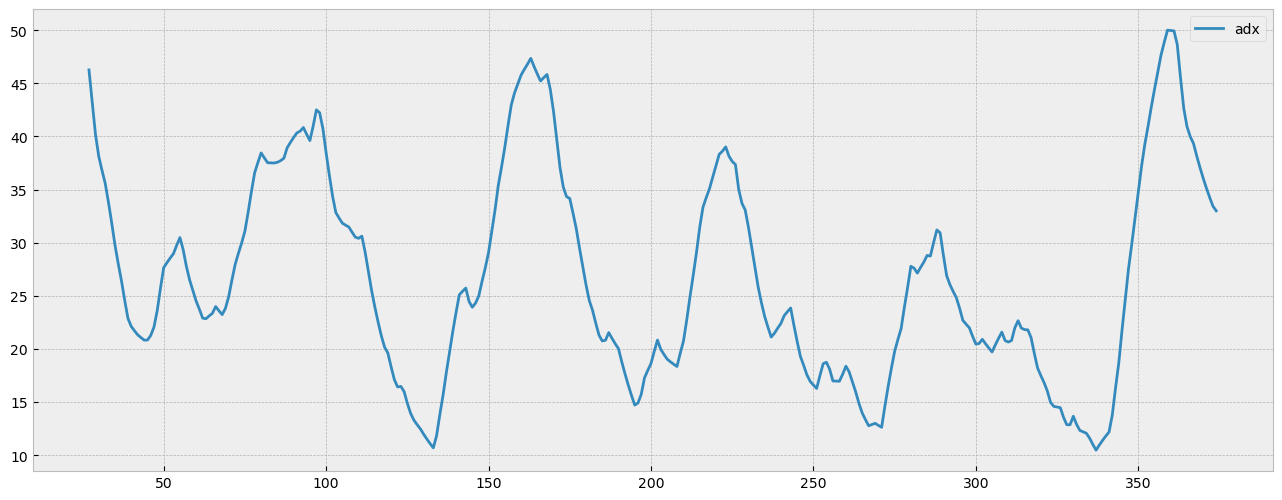

In [210]:
# ADX Indicator
aapl['adx']  = ADX(aapl['High'], aapl['Low'], aapl['Close'], timeperiod=14)

aapl[['adx']].plot(figsize=(16,6)) 
plt.show()

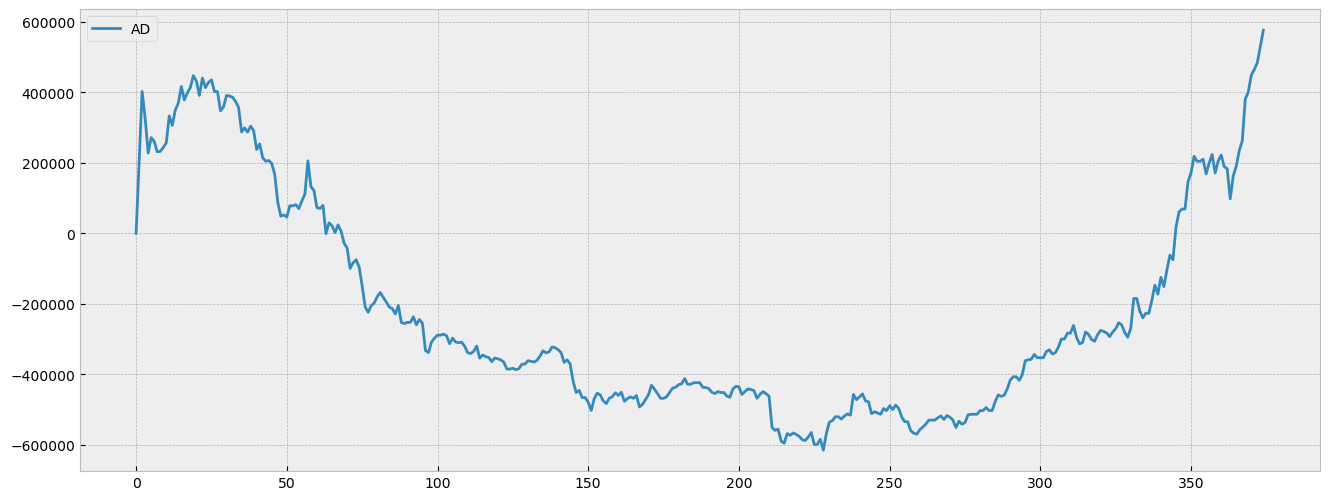

In [209]:
# Accumulation and Distribution line - Chaikin A/D Line

# AD = AD(high, low, close, volume)

aapl['AD'] = AD(aapl['High'], aapl['Low'], aapl['Close'], aapl['Volume'])

aapl[['AD']].plot(figsize=(16,6)) 
plt.show()

In [ ]:
# Stochastic
aapl['slowk'], aapl['slowd'] = ta.STOCH(aapl['High'], aapl['Low'], aapl['Close'], fastk_period=14, slowk_period=3, 
                                        slowk_matype=0, slowd_period=3, slowd_matype=0) 
aapl[['slowk','slowd']].plot(figsize=(12,6)) 
plt.show()

In [ ]:
# aapl.fillna(0)

In [ ]:
# Bollinger Bands 
aapl['upper_band'], aapl['middle_band'], aapl['lower_band'] = ta.BBANDS(aapl['Close'], timeperiod =20)

# Plot 
aapl[['Close','upper_band','middle_band','lower_band']].plot(figsize=(12,6)) 
plt.show()

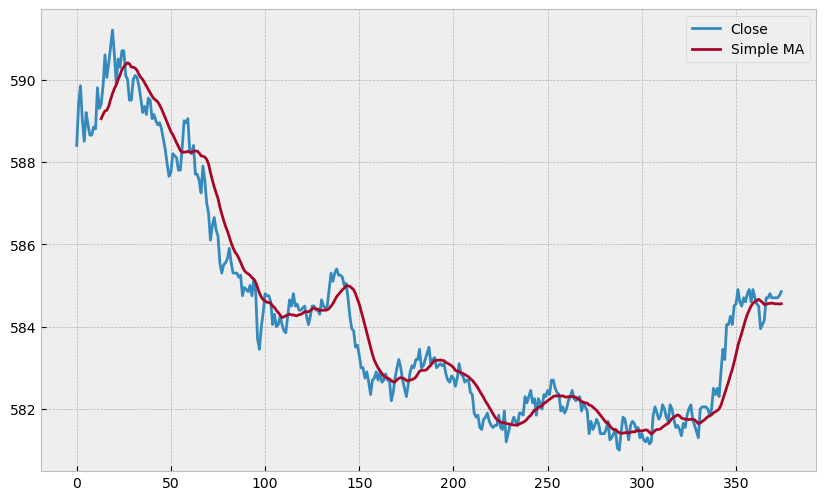

In [211]:
# Moving Average
aapl['Simple MA'] = ta.SMA(aapl['Close'],14)
aapl['EMA'] = ta.EMA(aapl['Close'], timeperiod = 14)

# Plot 
# aapl[['Close','Simple MA','EMA']].plot(figsize=(10,6))
aapl[['Close','Simple MA']].plot(figsize=(10,6))
plt.show()

### ===============================
### Next step - 16-JUL-23
#### 1. Add plots for all the 7 indicators
#### 2. Define process to compare these indicators in numbers and get alerts.


In [ ]:
# print(AROON)

In [ ]:
# print(AROON.info)

In [ ]:
# print(AD)

In [ ]:
aapl.fillna(0)
aapl

In [ ]:
print(aapl.loc[aapl['hour_mins'] == '936', 'Close'].iloc[0])

In [ ]:
for x in range(21, 26):
  print(aapl.loc[aapl['hour_mins']])

# for date in aapl.index:
# #     rsi2 = 
#     print(aapl['aroonup'])

In [ ]:
for idx in range(1,2):
#         print(df_pd.iloc[idx, 0], df_pd.iloc[idx, 1])  
        print(aapl.iloc[idx, 0], aapl.iloc[idx, 1], aapl['aroonup'].loc[0])